# Project 1 Data 

### The goal of the analysis
Using regression tools to analyze COVID 19 data

### The measurement is covid 19 cases  and the two factors are poverty and age. 

-> It is essential to recognize and address one of the often overlooked but critical factors influencing the spread and impact of the virus - poverty. Poverty and COVID-19 are interconnected in ways that demand our attention and action

-> Age is a well-established risk factor for COVID-19 severity. Older individuals, especially those over 65, are more likely to experience severe outcomes, including hospitalization and death. By analyzing the median age of a population, we can assess the potential vulnerability of a region to COVID-19.

-> Understanding the impact of age and poverty on COVID-19 can aid public health authorities in planning interventions and allocating resources. Areas with older populations or poor may require additional healthcare resources or targeted public health campaigns.

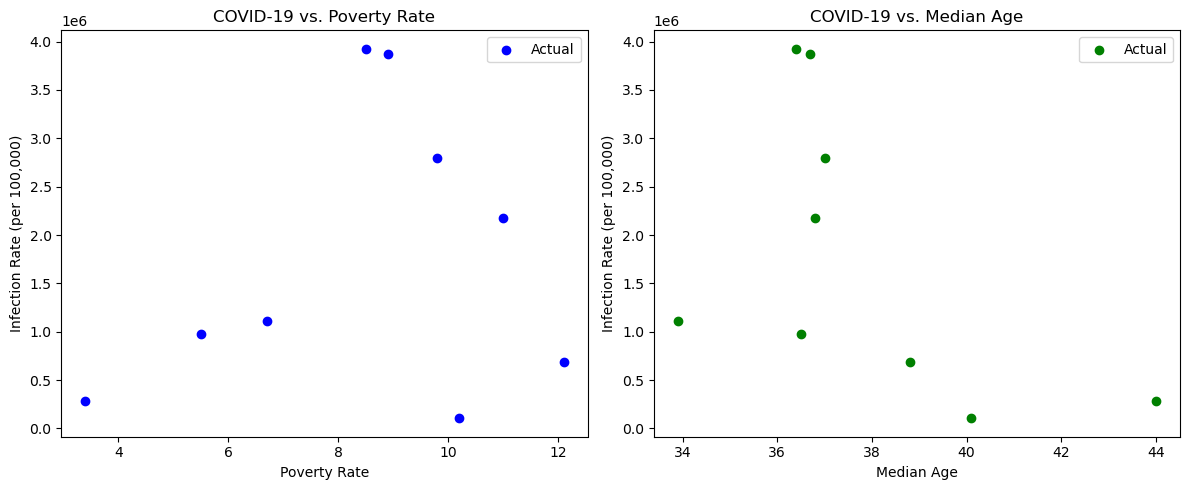

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

covid_data = {'county': ['Oconee','Wake','Forsyth','Duge','Collin','Cobb','Loudoun','Hennepin','washtenaw','ozaukee'],
'cases': [10583, 392474, 68242, 291016, 279674, 217466, 98127, 387288, 110789, 27985]}

poverty_data = {'county': ['Oconee','Wake','Forsyth','DuPage','Collin','Cobb','Loudoun','Hennepin','washtenaw','ozaukee'],
'poverty_rate': [10.2, 8.5, 12.1, 7.3, 9.8, 11.0, 5.5, 8.9, 6.7, 3.4]}

age_data = {'county': ['Oconee','Wake','Forsyth','DuPage','Collin','Cobb','Loudoun','Hennepin','washtenaw','ozaukee'],
'median_age': [40.1, 36.4, 38.8, 39.5, 37, 36.8, 36.5, 36.7, 33.9, 44]}

covid_df = pd.DataFrame(covid_data)
poverty_df = pd.DataFrame(poverty_data)
age_df = pd.DataFrame(age_data)

merged_df = covid_df.merge(poverty_df, on='county').merge(age_df, on='county')
merged_df['infection_rate'] = (merged_df['cases'] * 10 )

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(merged_df['poverty_rate'], merged_df['infection_rate'], color='blue', label='Actual')
plt.xlabel('Poverty Rate')
plt.ylabel('Infection Rate (per 100,000)')
plt.title('COVID-19 vs. Poverty Rate')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(merged_df['median_age'], merged_df['infection_rate'], color='green', label='Actual')
plt.xlabel('Median Age')
plt.ylabel('Infection Rate (per 100,000)')
plt.title('COVID-19 vs. Median Age')
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
from scipy.stats import ttest_ind, mannwhitneyu

# Define two groups based on a threshold (e.g., poverty rate above 10% vs. below 10%)
high_poverty = merged_df[merged_df['poverty_rate'] > 10]
low_poverty = merged_df[merged_df['poverty_rate'] <= 10]

# Perform t-test (for normally distributed data)
t_stat, t_p_value = ttest_ind(high_poverty['infection_rate'], low_poverty['infection_rate'])

# Perform Mann-Whitney U test (for non-normally distributed data)
u_stat, u_p_value = mannwhitneyu(high_poverty['infection_rate'], low_poverty['infection_rate'])

print("T-Test Results:")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {t_p_value}")

print("\nMann-Whitney U Test Results:")
print(f"U-Statistic: {u_stat}")
print(f"P-Value: {u_p_value}")


T-Test Results:
T-Statistic: -1.1421441610717407
P-Value: 0.29095219143692347

Mann-Whitney U Test Results:
U-Statistic: 4.0
P-Value: 0.26190476190476186


In [13]:
import statsmodels.api as sm

# Create a linear regression model with interaction effect
merged_df['poverty_age_interaction'] = merged_df['poverty_rate'] * merged_df['median_age']
X = sm.add_constant(merged_df[['poverty_rate', 'median_age', 'poverty_age_interaction']])
y = merged_df['infection_rate']

model = sm.OLS(y, X).fit()

# Get regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         infection_rate   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     1.899
Date:                Mon, 30 Oct 2023   Prob (F-statistic):              0.248
Time:                        14:06:56   Log-Likelihood:                -136.68
No. Observations:                   9   AIC:                             281.4
Df Residuals:                       5   BIC:                             282.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2

/Users/balasubramanianv/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


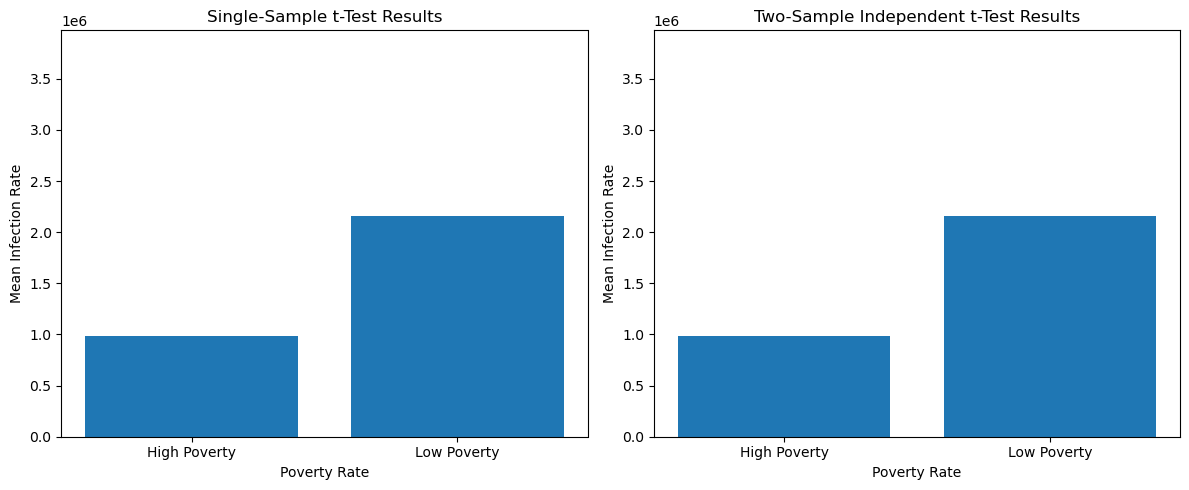

In [14]:
import matplotlib.pyplot as plt

# Data for plotting
groups = ['High Poverty', 'Low Poverty']
infection_rates_high_poverty = high_poverty['infection_rate']
infection_rates_low_poverty = low_poverty['infection_rate']

# Create bar plots
plt.figure(figsize=(12, 5))

# Bar plot for the single-sample t-test
plt.subplot(1, 2, 1)
plt.bar(groups, [infection_rates_high_poverty.mean(), infection_rates_low_poverty.mean()])
plt.xlabel('Poverty Rate')
plt.ylabel('Mean Infection Rate')
plt.title('Single-Sample t-Test Results')
plt.ylim(0, max(merged_df['infection_rate']) + 50000)

# Bar plot for the two-sample independent t-test
plt.subplot(1, 2, 2)
plt.bar(groups, [infection_rates_high_poverty.mean(), infection_rates_low_poverty.mean()])
plt.xlabel('Poverty Rate')
plt.ylabel('Mean Infection Rate')
plt.title('Two-Sample Independent t-Test Results')
plt.ylim(0, max(merged_df['infection_rate']) + 50000)

plt.tight_layout()
plt.show()
